# WALISA ROMSAIYUD - STOU

### **DEPLOY MODEL WITH FLASK WEB DEVELOPMENT**

***1) INSTALL PYTHON:  ***
https://www.python.org/downloads/
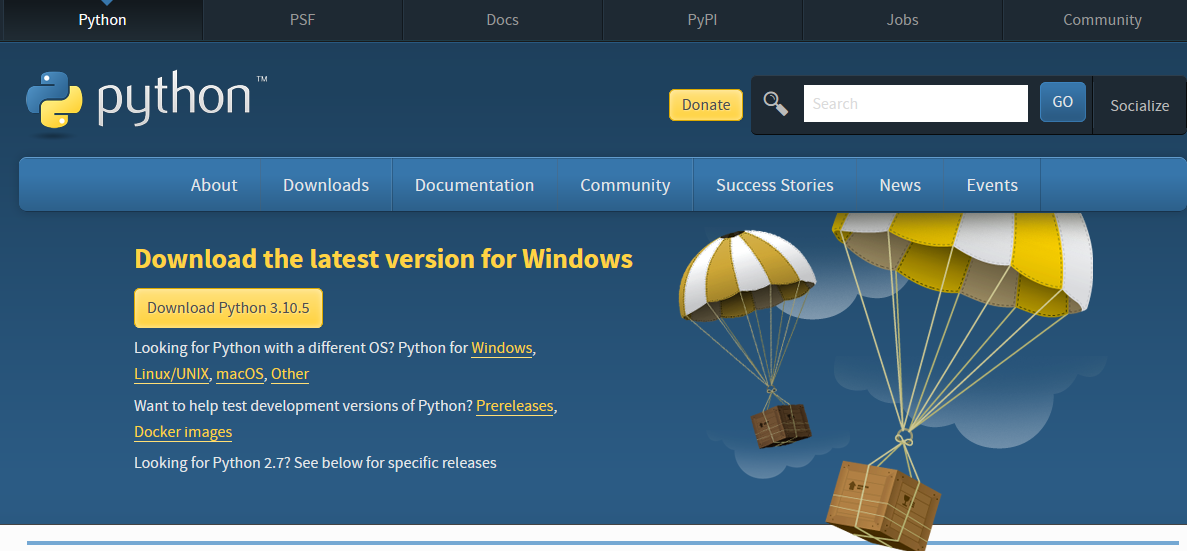

**2) CREATE A MODEL FILE (MODEL.SAV)**

In [ ]:
import sklearn #pip install scikit-learn
from sklearn.linear_model import LinearRegression
import joblib

#การอ่านไฟล์ .csv
dataset = pd.read_csv('GradingSystem.csv')
x = dataset.iloc[:, 2].values.reshape(-1, 1)  #อาเรย์ตัวแปรอิสระ
y = dataset.iloc[:, 3].values.reshape(-1, 1)  #อาเรย์ตัวแปรตาม

#การแบ่งข้อมูล
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3,random_state=0) 

#การสร้างแบบจำลองการถดถอยเชิงเส้นอย่างง่าย
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

#บันทึกแบบจำลองที่สร้างแล้ว เป็นไฟล์ชื่อว่า model.sav
filename = "model.sav"
joblib.dump(regression_model, filename)
newmodel = joblib.load(filename)
newmodel.predict([[30]]) 

**3) CREATE WEB APPLICATION (index.html)**

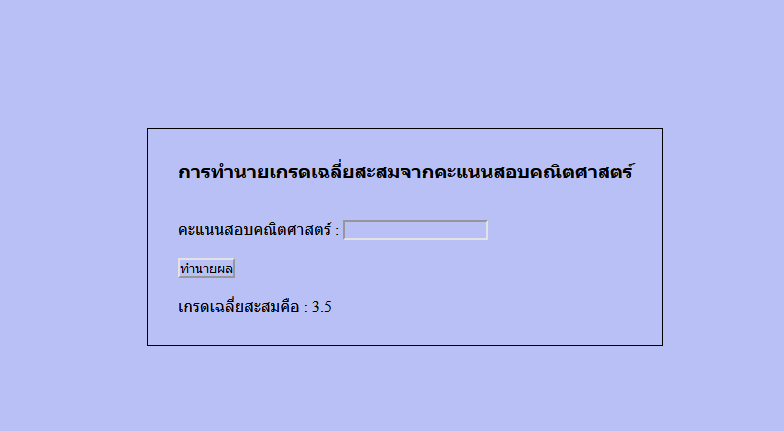

**4) CREATE PYTHON FILE FOR RUN WEB APPLICATION (INTEGRATING MODEL.SAV AND INDEX.HTML)**

In [2]:
from flask import Flask, render_template, request
import joblib
import numpy as np

app = Flask(__name__, template_folder='Template')

@app.route('/')
def home():
    return render_template("index.html")

def Prediction(test_data):
    calCGPA = np.array(test_data).reshape(-1, 1)
    newmodel = joblib.load('model.sav')
    result = newmodel.predict(calCGPA)
    return result[0]

@app.route('/', methods=['POST', 'GET'])
def result():
    if request.method == 'POST':
        test_data = request.form.to_dict()
        test_data = list(test_data.values())
        test_data = list(map(float, test_data))
        result = round(float(Prediction(test_data)), 2)
        return render_template("index.html", result=result)

if __name__ == '__main__':
    app.run() 


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
